In [ ]:
import itertools
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

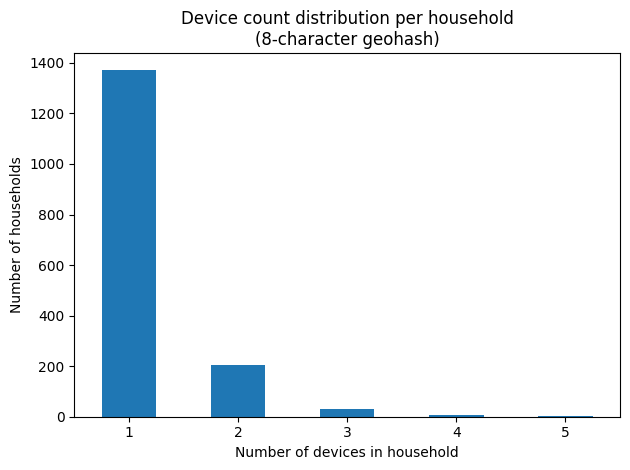

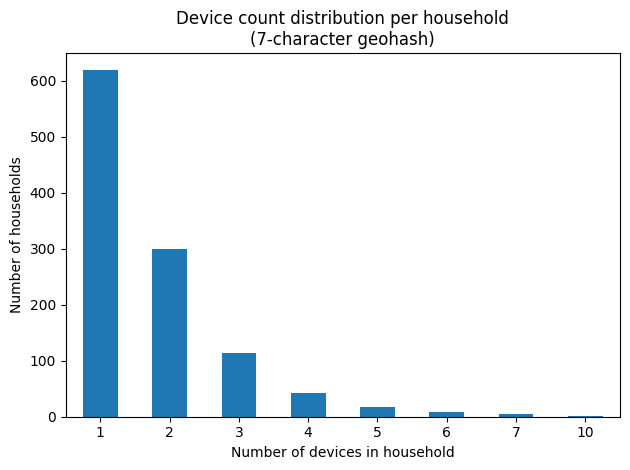

In [ ]:
# ------------------------------------------------------------------
# Grab the DataFrame that the user said is already in the workspace
# ------------------------------------------------------------------
result_df_subset=pd.read_csv('user_home_relation_2019-06-01.csv')
result_df_subset["home_geohash_7"] = result_df_subset["home_geohash_8"].str[:7]
df = globals().get("result_df_subset", None)

if df is None:
    raise RuntimeError(
        "I couldn't find `result_df_subset` in the current environment. "
        "Please run the cell that defines it before executing this one."
    )

# ------------------------------------------------------------------
# 1. Distribution using the original 8-character geohash
# ------------------------------------------------------------------
counts8 = (
    df.groupby("home_geohash_8")["device_id"]
      .nunique()
      .rename("num_devices")
)

plt.figure()
(
    counts8.value_counts()
           .sort_index()
           .plot(kind="bar", rot=0)
)
plt.title("Device count distribution per household\n(8-character geohash)")
plt.xlabel("Number of devices in household")
plt.ylabel("Number of households")
plt.tight_layout()
plt.show()

# ------------------------------------------------------------------
# 2. Distribution after truncating to 7 characters
# ------------------------------------------------------------------
df["home_geohash_7"] = df["home_geohash_8"].str[:7]
counts7 = (
    df.groupby("home_geohash_7")["device_id"]
      .nunique()
      .rename("num_devices")
)

plt.figure()
(
    counts7.value_counts()
           .sort_index()
           .plot(kind="bar", rot=0)
)
plt.title("Device count distribution per household\n(7-character geohash)")
plt.xlabel("Number of devices in household")
plt.ylabel("Number of households")
plt.tight_layout()
plt.show()


In [ ]:
graph_df=pd.read_csv('final_individual_social_network.csv')
# 1. Build lookup sets: edges with prediction == 1, and those with connection type == 1
connected_pairs = set()
type1_pairs = set()

for u, v, p, ctype in zip(graph_df['user_u'], graph_df['user_v'], graph_df['prediction'], graph_df['connection type']):
    if p == 1:
        edge = tuple(sorted([u, v]))
        connected_pairs.add(edge)
        if ctype == 1:
            type1_pairs.add(edge)

# Total number of type 1 edges (for computing the global share)
total_type1_edges = len(type1_pairs)

# 2. Group by household: get list of devices in each household
household_groups = result_df_subset.groupby('home_geohash_7')['device_id'].apply(list)

# 3. Iterate over each household and compute internal connection stats
total_pairs = 0                    # Total number of device pairs within households
connected_count = 0               # Number of predicted connected pairs
internal_type1_count = 0          # Number of type 1 connections within households

for device_list in household_groups:
    if len(device_list) < 2:
        continue  # Skip households with only one device

    # Enumerate all unordered device pairs within the household
    pairs = itertools.combinations(device_list, 2)
    for u, v in pairs:
        total_pairs += 1
        edge = tuple(sorted([u, v]))
        if edge in connected_pairs:
            connected_count += 1
        if edge in type1_pairs:
            internal_type1_count += 1

# 4. Compute ratios
if total_pairs == 0:
    ratio = float('nan')
    type1_internal_ratio = float('nan')
else:
    ratio = connected_count / total_pairs
    type1_internal_ratio = internal_type1_count / total_pairs

if total_type1_edges == 0:
    type1_share = float('nan')
else:
    type1_share = internal_type1_count / total_type1_edges

# 5. Print results
print('When precision is 7 digits geo hashcode')
print(f"Proportion of social connections within the same household: {ratio:.2%} ({connected_count} / {total_pairs})")
print(f"Proportion of bonding connections among all possible within-household device pairs: {type1_internal_ratio:.2%} ({internal_type1_count} / {total_pairs})")
print(f"Proportion of bonding connections that occur within the same household out of all bonding connections: {type1_share:.2%} ({internal_type1_count} / {total_type1_edges})")


When precision is 7 digits geo hashcode
Proportion of social connections within the same household: 62.04% (827 / 1333)
Proportion of bonding connections among all possible within-household device pairs: 15.15% (202 / 1333)
Proportion of bonding connections that occur within the same household out of all bonding connections: 68.24% (202 / 296)


In [ ]:
graph_df=pd.read_csv('final_individual_social_network.csv')
# 1. Build lookup sets: edges with prediction == 1, and those with connection type == 1
connected_pairs = set()
type1_pairs = set()

for u, v, p, ctype in zip(graph_df['user_u'], graph_df['user_v'], graph_df['prediction'], graph_df['connection type']):
    if p == 1:
        edge = tuple(sorted([u, v]))
        connected_pairs.add(edge)
        if ctype == 1:
            type1_pairs.add(edge)

# Total number of type 1 edges (for computing the global share)
total_type1_edges = len(type1_pairs)

# 2. Group by household: get list of devices in each household
household_groups = result_df_subset.groupby('home_geohash_8')['device_id'].apply(list)

# 3. Iterate over each household and compute internal connection stats
total_pairs = 0                    # Total number of device pairs within households
connected_count = 0               # Number of predicted connected pairs
internal_type1_count = 0          # Number of type 1 connections within households

for device_list in household_groups:
    if len(device_list) < 2:
        continue  # Skip households with only one device

    # Enumerate all unordered device pairs within the household
    pairs = itertools.combinations(device_list, 2)
    for u, v in pairs:
        total_pairs += 1
        edge = tuple(sorted([u, v]))
        if edge in connected_pairs:
            connected_count += 1
        if edge in type1_pairs:
            internal_type1_count += 1

# 4. Compute ratios
if total_pairs == 0:
    ratio = float('nan')
    type1_internal_ratio = float('nan')
else:
    ratio = connected_count / total_pairs
    type1_internal_ratio = internal_type1_count / total_pairs

if total_type1_edges == 0:
    type1_share = float('nan')
else:
    type1_share = internal_type1_count / total_type1_edges

# 5. Print results
print('When precision is 8 digits geo hashcode')
print(f"Proportion of social connections within the same household: {ratio:.2%} ({connected_count} / {total_pairs})")
print(f"Proportion of bonding connections among all possible within-household device pairs: {type1_internal_ratio:.2%} ({internal_type1_count} / {total_pairs})")
print(f"Proportion of bonding connections that occur within the same household out of all bonding connections: {type1_share:.2%} ({internal_type1_count} / {total_type1_edges})")


When precision is 8 digits geo hashcode
Proportion of social connections within the same household: 93.43% (327 / 350)
Proportion of bonding connections among all possible within-household device pairs: 41.71% (146 / 350)
Proportion of bonding connections that occur within the same household out of all bonding connections: 49.32% (146 / 296)
